In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import ElasticNetCV,ElasticNet,enet_path
from sklearn.datasets import make_regression
from redcap import Project

In [57]:
# # Import data from REDCap
# api_url = 'https://redcap.ucdenver.edu/api/'
# api_key = ''
# project = Project(api_url, api_key)
# data = project.export_records()

In [65]:
df = pd.read_csv('/Users/timvigers/Downloads/177844RenalBloodFlow_DATA_2021-12-13_1220.csv')
# Outcome and model matrices
y, X = dmatrices('igfr ~ r_rbf_avg + l_rbf_avg + l_rbf_avg_vein',data=df)
# LOO CV 
loo = LeaveOneOut()
regr = ElasticNetCV(cv=loo, random_state=0)
# ElasticNet CV
regr = regr.fit(X, y.ravel())
# Re-fit with optimized params
model = ElasticNet(alpha=regr.alpha_, l1_ratio=regr.l1_ratio_)
fit = model.fit(X, y)

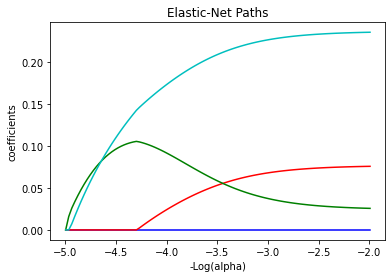

In [93]:
# Plot 
alphas_enet, coefs_enet, _ = fit.path(X,y)
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_e, c in zip(coefs_enet[0], colors):
    l2 = plt.plot(neg_log_alphas_enet, coef_e, c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net Paths")
plt.axis("tight");